<font size="8" face="algerian" color="yellow">Car Sales Analysis</font>


### Libraries needed

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from warnings import filterwarnings
filterwarnings('ignore')

### Load the dataset

In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\Programming_Files\Python_Jubyter\Automobile_Sales_Analysis_Project\Auto_Sales_data.csv',
                 parse_dates=['ORDERDATE'], dayfirst=True,date_format='%dd%mm%yy')

# Checking sample of the data
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [3]:
# We create a new feature 'DATE_SINCE_LASTORDER' based on the 'ORDERDATE' and the 'DAYS_SINCE_LASTORDER'

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['DATE_SINCE_LASTORDER'] = df['ORDERDATE'] - pd.to_timedelta(df['DAYS_SINCE_LASTORDER'], unit='D')

# View sample of the data
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DATE_SINCE_LASTORDER
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2015-11-19
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,2016-04-10
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,2016-07-28
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,2016-11-14
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,2017-03-21


In [4]:
# Dimension of the data
df.shape

(2747, 21)

In [5]:
df.isna().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
DATE_SINCE_LASTORDER    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# Information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

<font size="5" face="times new roman" color="blue">Data Characteristics</font><br></br>
<p><font size="3" face="times new roman">
1. The dataset contains 2,747 entries and 20 columns<br>
2. The count of NAs (missing values) was 0, hence no missing values<br>
3. The key columns of the date set in based on sales transactions,customer information, product details, order status and recency information.<br>
4. Data types vary accros datetime, int, float and objects.  
</font></p>

<font size="5" face="times new roman" color="yellow">EXPLORATION DATA ANALYSIS</font>

### Numerical Variables

In [8]:
# We remove the ordernumber since it's IDs every transaction uniquely, 
# We will remove it for the EDA and Visualization

df_numeric = df.select_dtypes(include = ['int','float']).drop('ORDERNUMBER', axis=1)

# Showing the columns
df_numeric.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES',
       'DAYS_SINCE_LASTORDER', 'MSRP'],
      dtype='object')

### Categorical Variables

In [9]:

df_categorical = df.select_dtypes(include = ['datetime','object']).drop(
    ['CONTACTFIRSTNAME', 'PHONE','ADDRESSLINE1','CONTACTLASTNAME'],axis=1)

# Showing the columns
df_categorical.columns

Index(['ORDERDATE', 'STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME',
       'CITY', 'POSTALCODE', 'COUNTRY', 'DEALSIZE', 'DATE_SINCE_LASTORDER'],
      dtype='object')

<font size="5" face="times new roman" color="yellow">Descriptive Analysis</font>

In [10]:
# Numerical Features

round(df_numeric.describe(),2).transpose()

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2747.0,35.10,9.76,6.00,27.00,35.00,43.00,97.00
PRICEEACH,2747.0,101.10,42.04,26.88,68.74,95.55,127.10,252.87
ORDERLINENUMBER,2747.0,6.49,4.23,1.00,3.00,6.00,9.00,18.00
SALES,2747.0,3553.05,1838.95,482.13,2204.35,3184.80,4503.09,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.09,819.28,42.00,1077.00,1761.00,2436.50,3562.00
MSRP,2747.0,100.69,40.11,33.00,68.00,99.00,124.00,214.00


In [11]:
# Categorical Features

round(df_categorical.select_dtypes(include = ['object']).describe()).transpose()

,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
DEALSIZE,2747,3,Medium,1349


<font size="5" face="times new roman" color="yellow">Insights</font>🔍.


### Numerical Summary

1. **QUANTITYORDERED**: 
   - The average quantity ordered is approximately 35 units, with a standard deviation of around 9.76 units.
   - Orders typically range from 6 to 97 units, with 50% of orders falling between 27 and 43 units.

2. **PRICEEACH**:
   - The average price per item is about $101.10, with a standard deviation of approximately $42.04.
   - Prices range from $26.88 to $252.87, with half of the prices between $68.74 and $127.10.

3. **ORDERLINENUMBER**:
   - On average, orders consist of around 6.49 items, with a standard deviation of about 4.23.
   - The order line numbers range from 1 to 18, with 50% of orders having between 3 and 9 line items.

4. **SALES**:
   - The average sales amount is $3,553.05, with a standard deviation of $1,838.95.
   - Sales values vary from $482.13 to $14,082.80, with half of the sales falling between $2,204.35 and $4,503.09.

5. **DAYS_SINCE_LASTORDER**:
   - On average, the time since the last order is approximately 1,757.09 days, with a standard deviation of around 819.28 days.
   - The duration since the last order ranges from 42 to 3,562 days, with half of the orders occurring within 1,077 to 2,436 days.

6. **MSRP**:
   - The Manufacturer's Suggested Retail Price (MSRP) has an average value of $100.69, with a standard deviation of $40.11.
   - MSRP values range from $33.00 to $214.00, with 50% of the MSRP falling between $68.00 and $124.00.

### Categorical Summary

1. **STATUS**:
   - There are 6 unique statuses.
   - The most common status is "Shipped", appearing 2541 times.

2. **PRODUCTLINE**:
   - There are 7 unique product lines.
   - The most common product line is "Classic Cars", appearing 949 times.

3. **PRODUCTCODE**:
   - There are 109 unique product codes.
   - The most frequent product code is "S18_3232", occurring 51 times.

4. **CUSTOMERNAME**:
   - There are 89 unique customer names.
   - The most common customer name is "Euro Shopping Channel", appearing 259 times.

5. **CITY**:
   - There are 71 unique cities.
   - The most common city is "Madrid", appearing 304 times.

6. **POSTALCODE**:
   - There are 73 unique postal codes.
   - The most frequent postal code is "28034", occurring 259 times.

7. **COUNTRY**:
   - There are 19 unique countries.
   - The most common country is "USA", appearing 928 times.

8. **DEALSIZE**:
   - There are 3 unique deal sizes.
   - The most common deal size is "Medium", appearing 1349 times.

<font size="5" face="times new roman" color="yellow">UNIVARITE ANALYSIS</font>


Description of QUANTITYORDERED
----------------------------------------------------------------------------


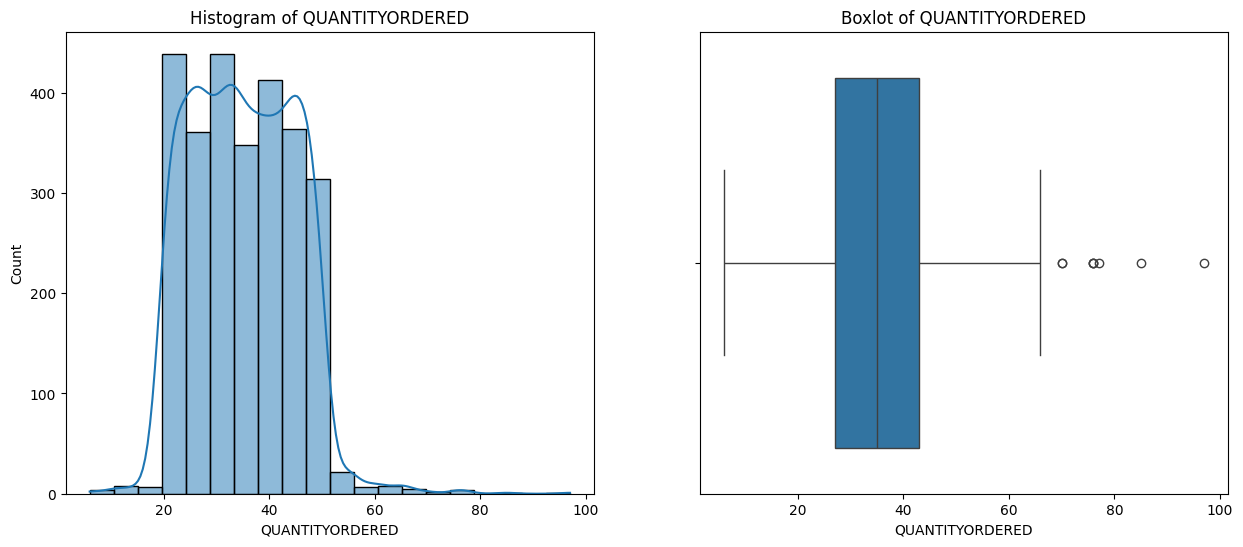

Description of PRICEEACH
----------------------------------------------------------------------------


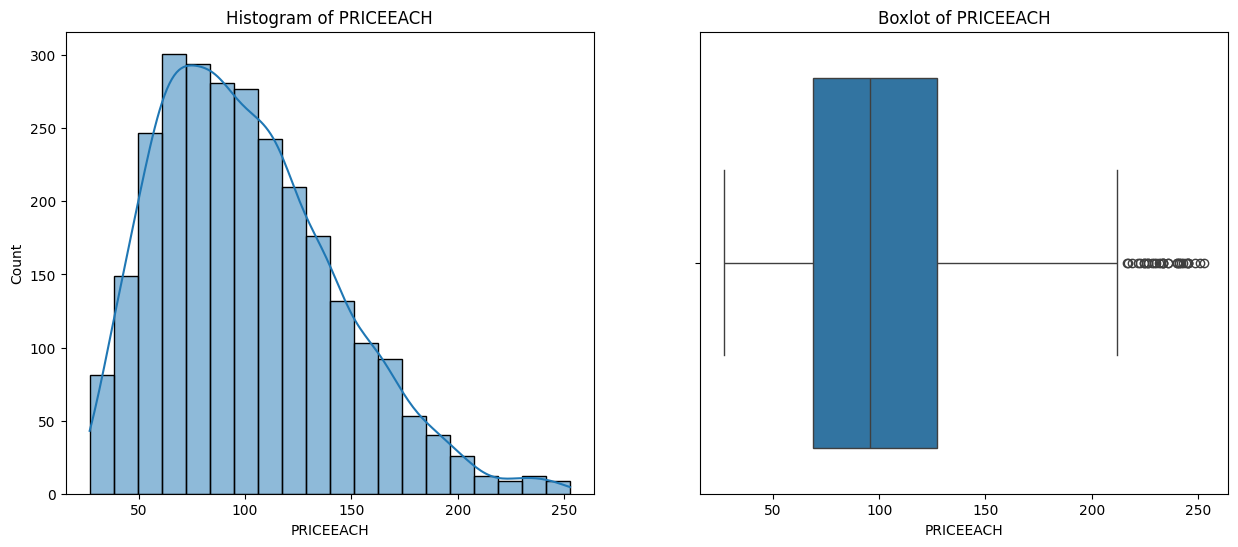

Description of ORDERLINENUMBER
----------------------------------------------------------------------------


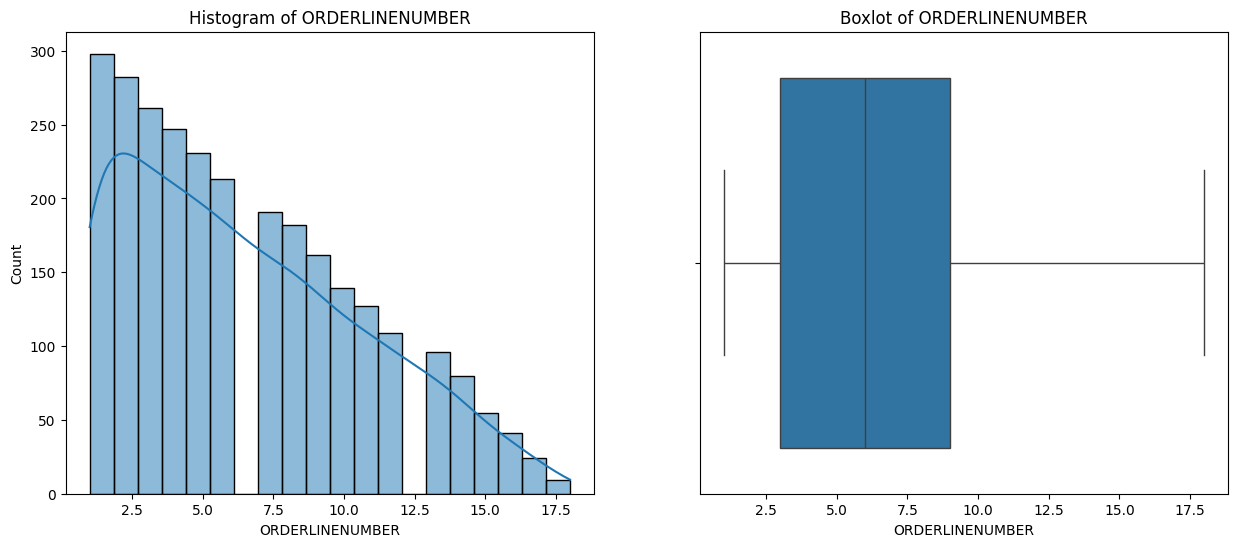

Description of SALES
----------------------------------------------------------------------------


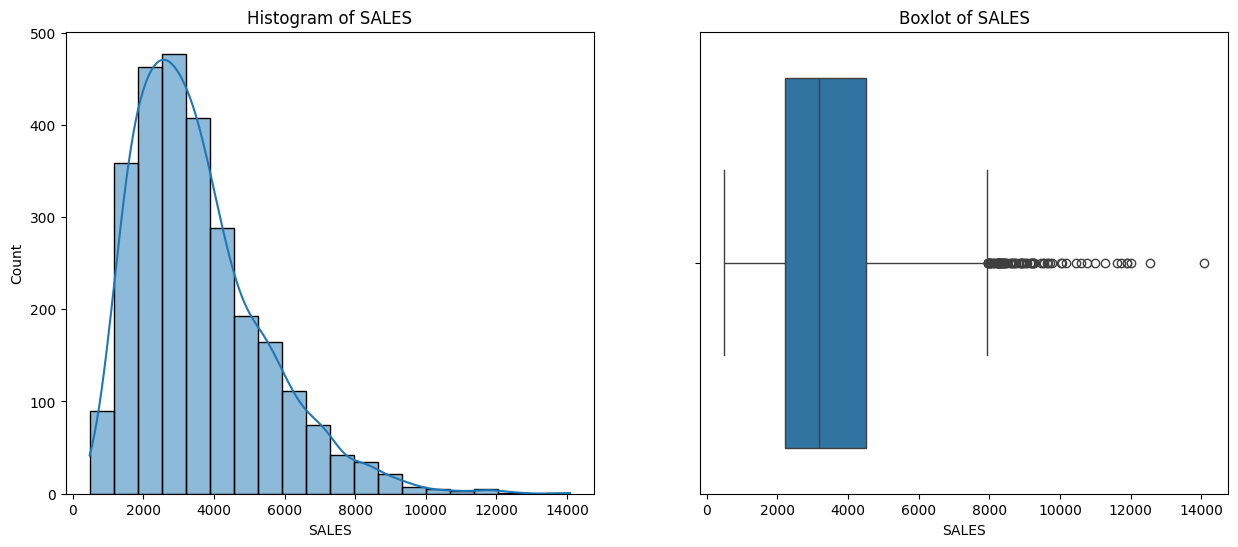

Description of DAYS_SINCE_LASTORDER
----------------------------------------------------------------------------


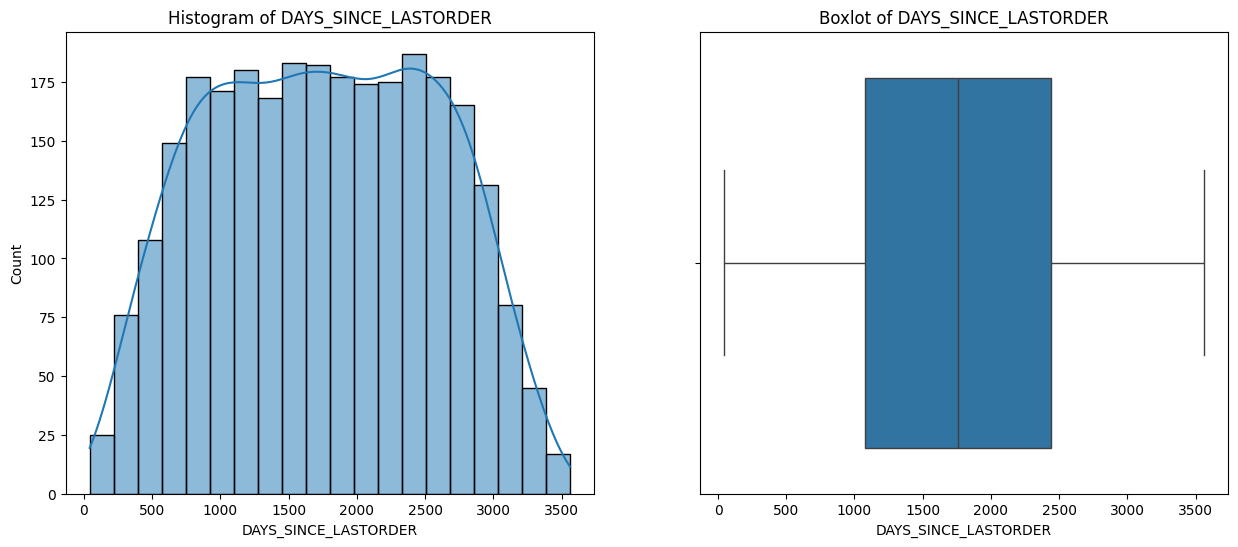

Description of MSRP
----------------------------------------------------------------------------


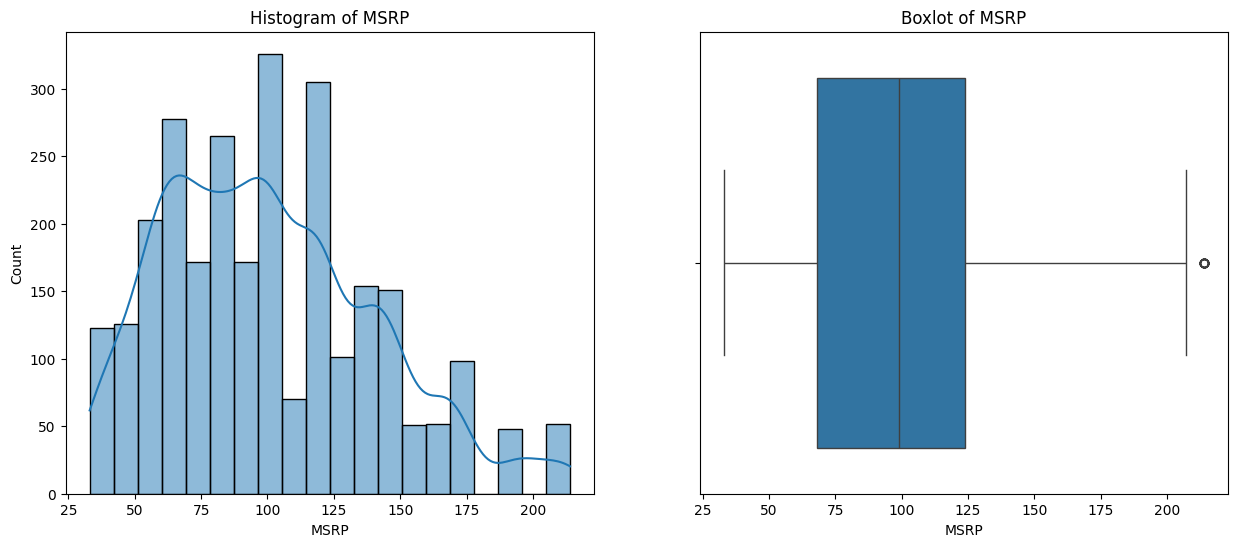

In [12]:
def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot histogram
    sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0])
    axes[0].set_title("Histogram of " + column)
    
    # Plot Boxplot plot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title("Boxlot of " + column )
    plt.show()
for x in df_numeric:
    univariateAnalysis_numeric(x,20)

In [13]:

cat_columns = df[['STATUS', 'PRODUCTLINE', 'DEALSIZE']]
def univariateAnalysis_category(cols):
    
    print("Distribution of", cols)
    print("_"* 60)
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    value_counts = cat_columns[cols].value_counts()
    
    # Count plot
    fig = px.bar(value_counts,x=value_counts.index, y=value_counts.values, title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},color_discrete_sequence=[colors])
    fig.update_layout(width=700, plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    
    fig.show()
    print('')
    
    # Donut chart
    percentage = (value_counts / value_counts.sum()) * 100
    fig = px.pie( values=percentage, names=value_counts.index,
        labels={'names': 'Categories', 'values': 'Percentage'}, hole=0.5,color_discrete_sequence=colors)
    fig.add_annotation( x=0.5, y=0.5, align="center", xref="paper",
        yref="paper", showarrow=False, font_size=15, text=f'{cols}')
    fig.update_layout(legend=dict(x=0.9, y=0.5))
    fig.update_layout(width=700)
    
    fig.show()
    print('')
    
for x in cat_columns:
    univariateAnalysis_category(x)


Distribution of STATUS
____________________________________________________________



Distribution of PRODUCTLINE
____________________________________________________________



Distribution of DEALSIZE
____________________________________________________________


In [14]:
# Top 10 Countries contribution
top_10_country = df['COUNTRY'].value_counts().head(10)

# Creating the funnel chart
fig = go.Figure( go.Funnel(x = top_10_country.values, y = top_10_country.index,
                           marker = {'color':px.colors.sequential.BuGn_r}))
fig.update_layout(title = 'Top 10 Country Distribution', template = 'plotly_white')

fig.show()



In [15]:
# Top 10 Cities contribution
top_10_city = df['CITY'].value_counts().head(10)

# Creating the funnel chart
fig = go.Figure( go.Funnel(x = top_10_city.values, y = top_10_city.index,
                           marker = {'color':px.colors.sequential.BuGn_r}))
fig.update_layout(title = 'Top 10 Country Distribution', template = 'plotly_white')

fig.show()



In [16]:
# Top 10 Customers contribution
top_10_customer = df['CUSTOMERNAME'].value_counts().head(10)

# Creating the funnel chart
fig = go.Figure( go.Funnel(x = top_10_customer.values, y = top_10_customer.index,
                           marker = {'color':px.colors.sequential.BuGn_r}))
fig.update_layout(title = 'Top 10 Customer Distribution', template = 'plotly_white')

fig.show()



<font size="5" face="times new roman" color="yellow">BIVARITE ANALYSIS</font>


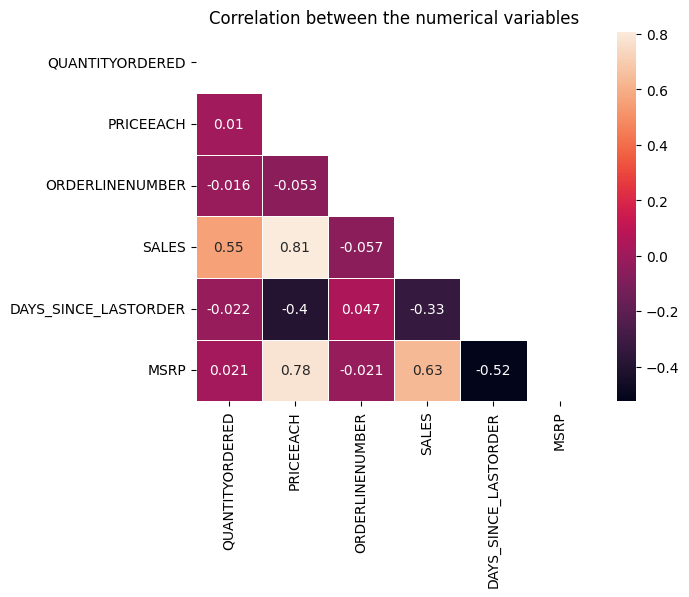

In [17]:
# Finding the correlation between the numerical values
correlation = df_numeric.corr()
sns.heatmap(correlation,annot=True, linewidths=0.5, mask = np.triu(np.ones_like(correlation)))
plt.title('Correlation between the numerical variables')

plt.show()


<font size = '5' face = 'times new roman' color = 'yellow' >Correlation Insights</font>

1. **QUANTITYORDERED vs. Sales**:
   - Positive correlation with SALES (0.553): Indicates that higher quantities ordered from customers are associated with higher sales for the company.(Which is always true).
   - Weak negative correlation with DAYS_SINCE_LASTORDER (-0.022): Indicates a very weak inverse relationship between quantity ordered and the number of days since the last order.

2. **PRICEEACH vs. Sales and orderlinenumber**:
   - Strong positive correlation with SALES (0.808): Indicates that the higher prices of each car the higher the sales generated by the company.
   - Weak negative correlation with ORDERLINENUMBER (-0.053): This means when the prices of cars increases it does not affect the order line number that much.

4. **DAYS_SINCE_LASTORDER vs. QUANTITYORDERED**:
   - Weak negative correlation with QUANTITYORDERED (-0.022): Indicates a very weak inverse relationship between the number of days since the last order and quantities ordered. This means the customers return to buy cars but in smaller quantities often.

5. **MSRP vs. PRICEEACH**:
   - Strong positive correlation with PRICEEACH (0.778) and SALES (0.635): Indicates that higher manufacturer's suggested retail prices are strongly associated with higher price each and moderately associated with higher sales.

Text(0.0, 1.0, 'Sales by DealSize')

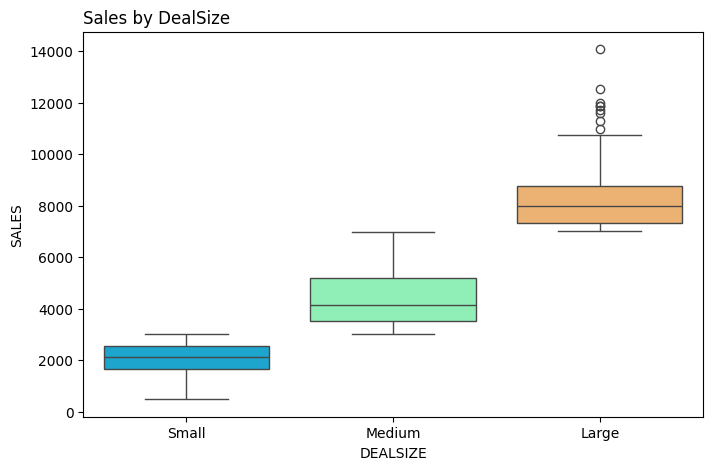

In [18]:
plt.figure(figsize=(8,5))

sns.boxplot(data = df, x = 'DEALSIZE', y = 'SALES', palette='rainbow')
plt.title('Sales by DealSize', loc = 'left')

Text(0.0, 1.0, 'Sales by ProductLine')

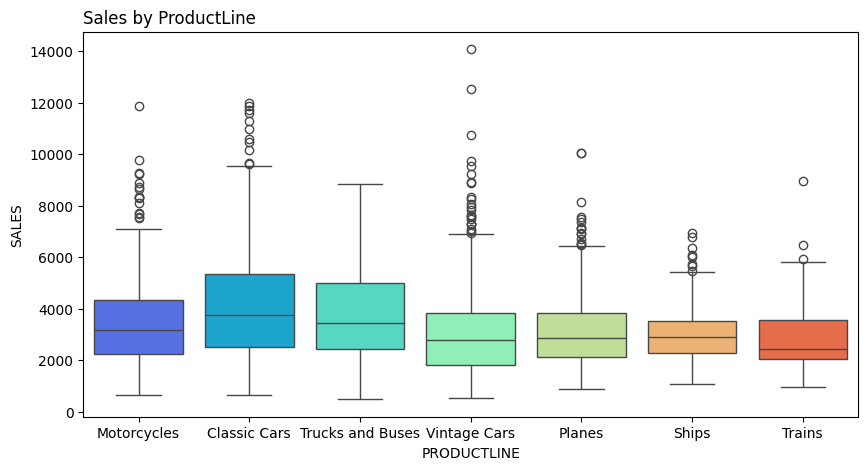

In [19]:
plt.figure(figsize=(10,5))

sns.boxplot(data = df, x = 'PRODUCTLINE', y = 'SALES', palette='rainbow')
plt.title('Sales by ProductLine', loc = 'left')

<font size = '5' face = 'times new roman'  color = 'green'><b>Yearly, Quarterly, Monthly and Weekely Sales Trend</b></font>

In [45]:
# Extract our Year, Quarters, Months and Weeks
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Quaters'] = df['ORDERDATE'].dt.quarter
df['Week'] = df['ORDERDATE'].dt.isocalendar().week
df['Year'].unique()

array([2018, 2019, 2020])

Text(0.0, 1.0, 'Yearly Sales')

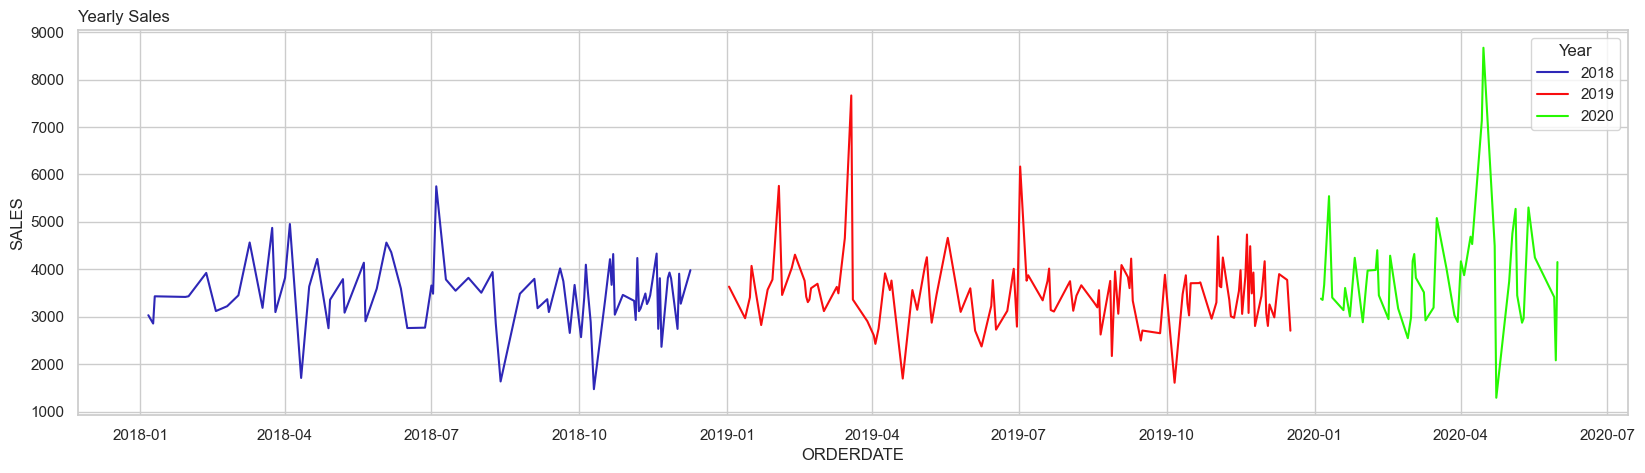

In [54]:
# Yearly Sales
plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
col = ['#2E27B7','#F80D0F','#26F801']

sns.lineplot(data = df, x = 'ORDERDATE', y = 'SALES', hue = 'Year', ci = None,palette=col)
plt.title('Yearly Sales', loc = 'left')

Text(0.0, 1.0, 'Quater Sales')

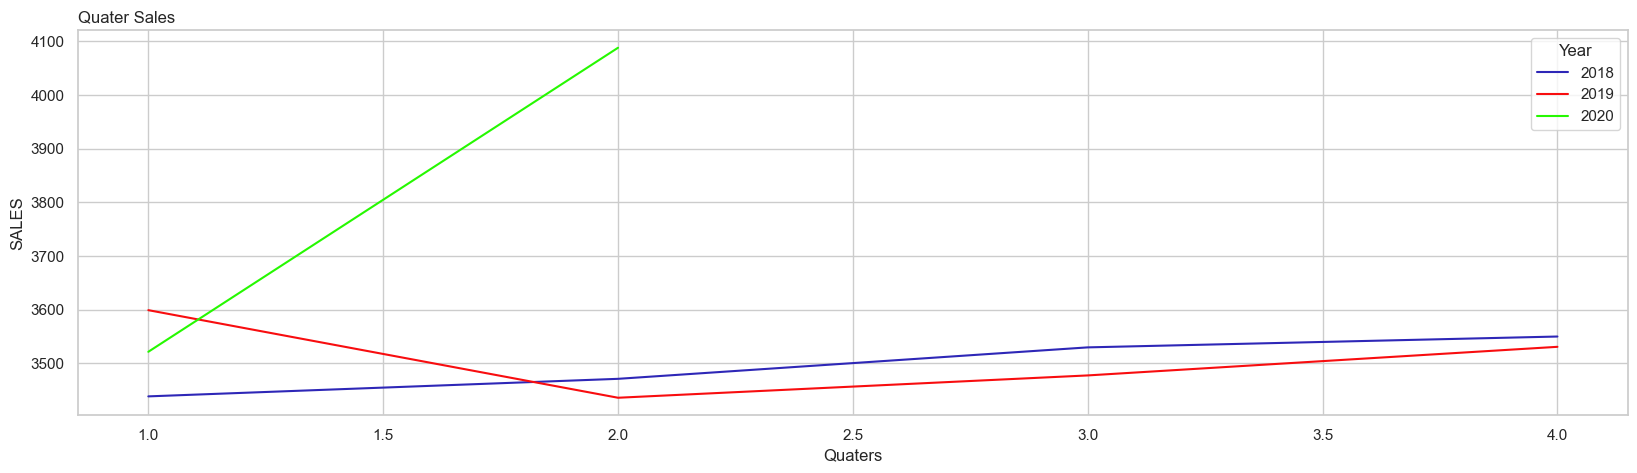

In [55]:
# Quarterly Sales
plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
col = ['#2E27B7','#F80D0F','#26F801']

sns.lineplot(data = df, x = 'Quaters', y = 'SALES', hue = 'Year', ci = None,palette=col)
plt.title('Quater Sales', loc = 'left')

Text(0.0, 1.0, 'Monthly Sales')

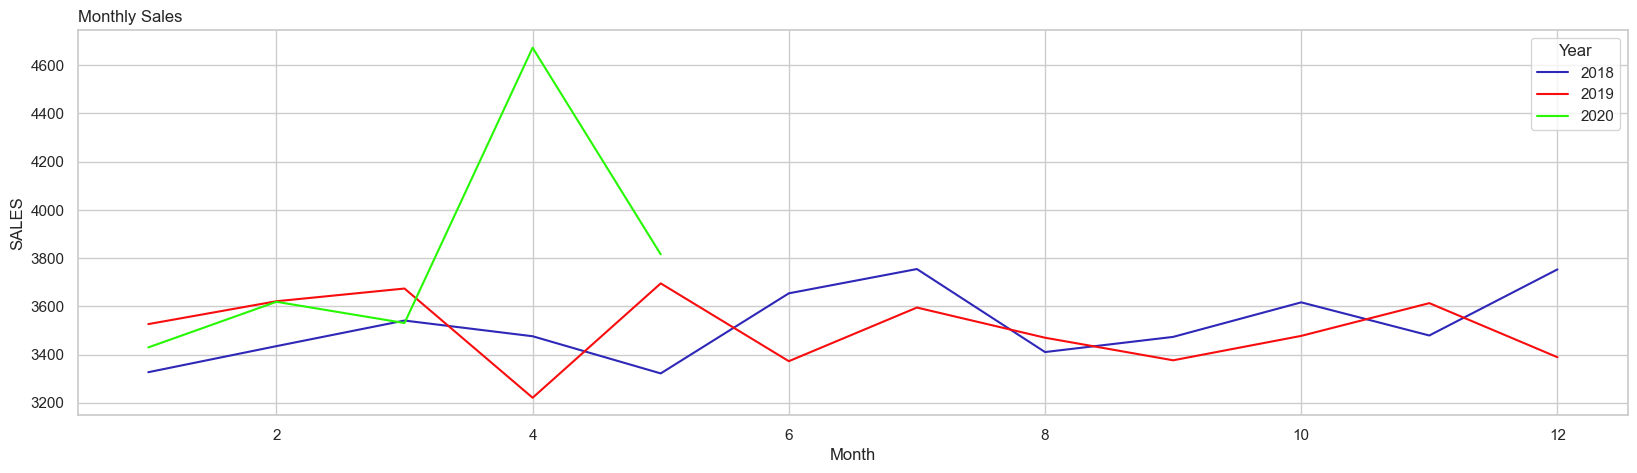

In [75]:
# Monthly Sales

plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
col = ['#2E27B7','#F80D0F','#26F801']

sns.lineplot(data = df, x = 'Month', y = 'SALES', hue = 'Year', ci = None,palette=col)
plt.title('Monthly Sales', loc = 'left')


Text(0.0, 1.0, 'Weekly Sales')

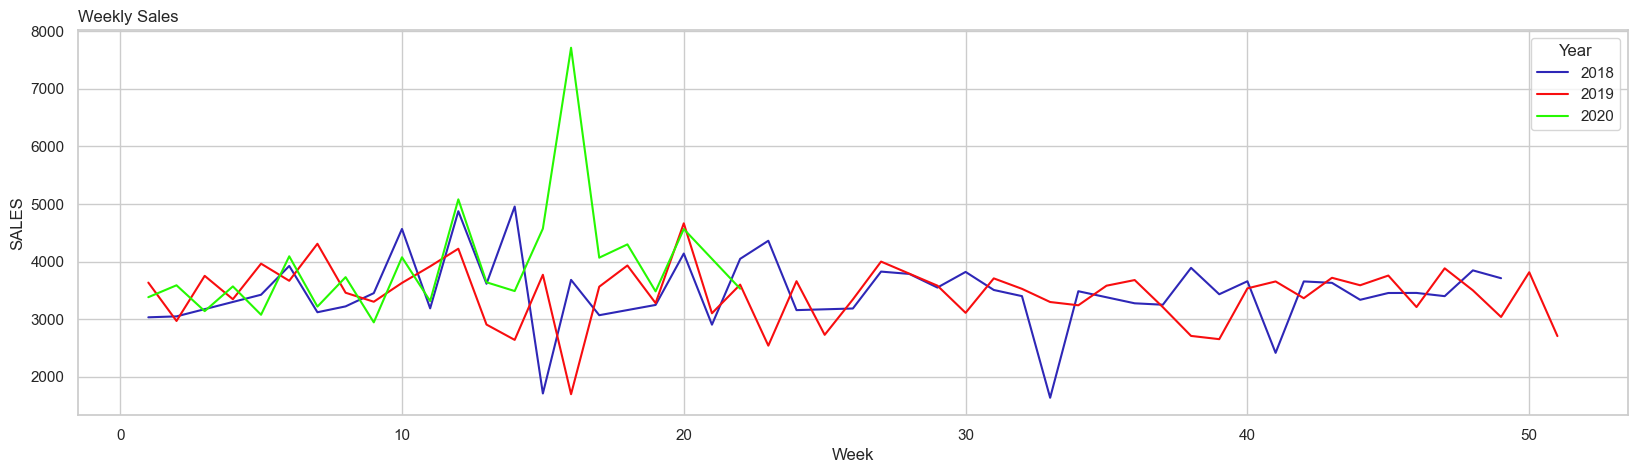

In [57]:
# Weekly Sales
plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
col = ['#2E27B7','#F80D0F','#26F801']

sns.lineplot(data = df, x = 'Week', y = 'SALES', hue = 'Year', ci = None,palette=col)
plt.title('Weekly Sales', loc = 'left')

<font size = 5 face = 'times new roman' color = 'green'><b>MULTIVARIATE ANALYSIS</b></font>

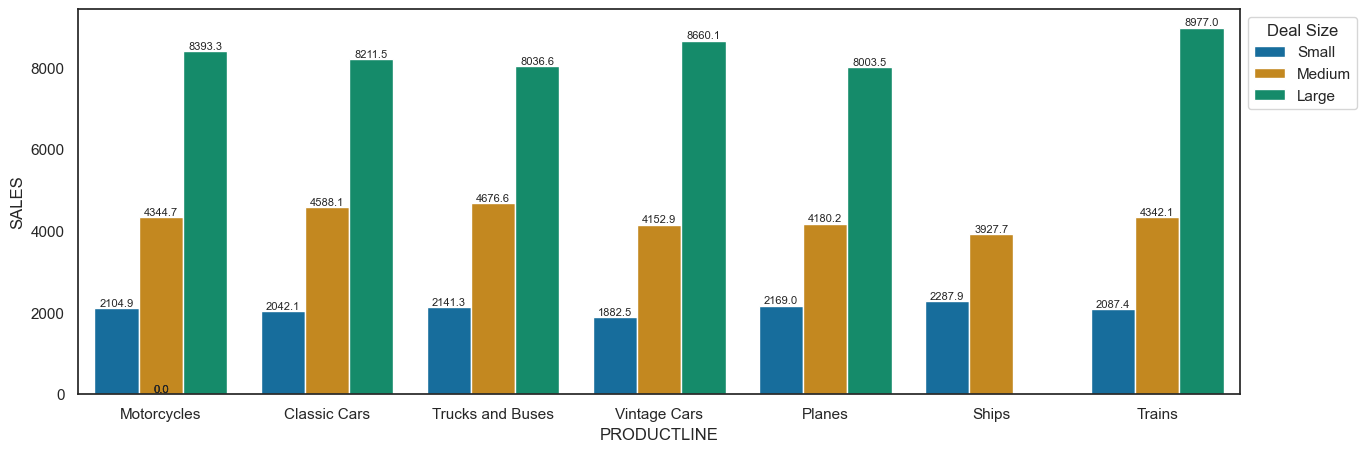

In [73]:
# Comparison of Sales by Productline with hue as Dealsize
sns.set_theme(style='white')
plt.figure(figsize= (15,5))

sns.barplot(data = df, x = 'PRODUCTLINE', y = 'SALES', hue = 'DEALSIZE', ci = None, palette='colorblind')
plt.legend(title = 'Deal Size',bbox_to_anchor = (1,1))
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8)
    
    

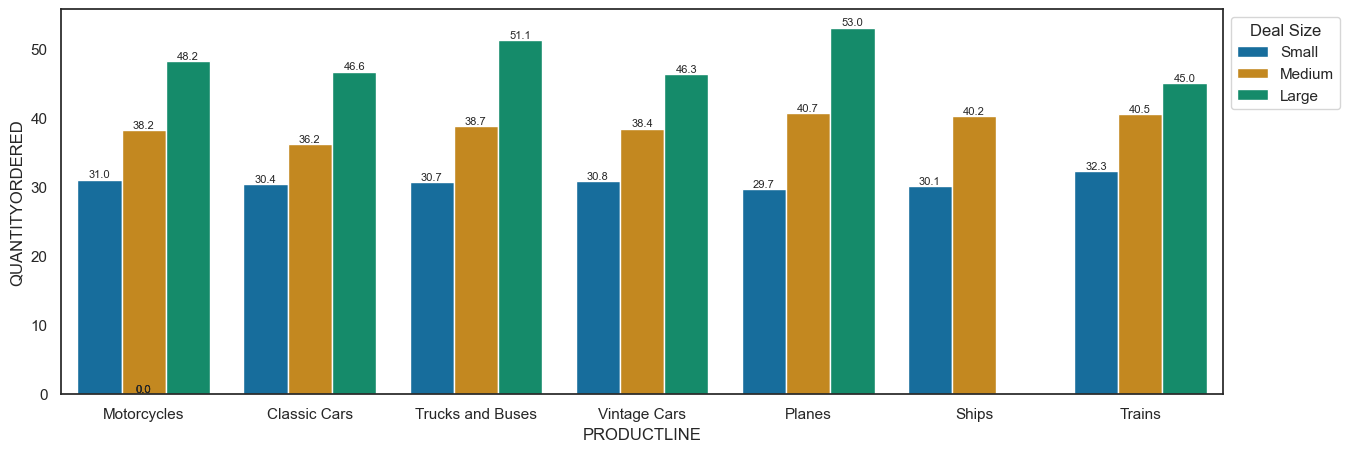

In [72]:
# Comparison of QuantityOrdered by Productline with hue as Dealsize
sns.set_theme(style='white')
plt.figure(figsize= (15,5))

sns.barplot(data = df, x = 'PRODUCTLINE', y = 'QUANTITYORDERED', hue = 'DEALSIZE', ci = None, palette='colorblind')
plt.legend(title = 'Deal Size',loc = 'upper left',bbox_to_anchor = (1,1))

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8)
    
    

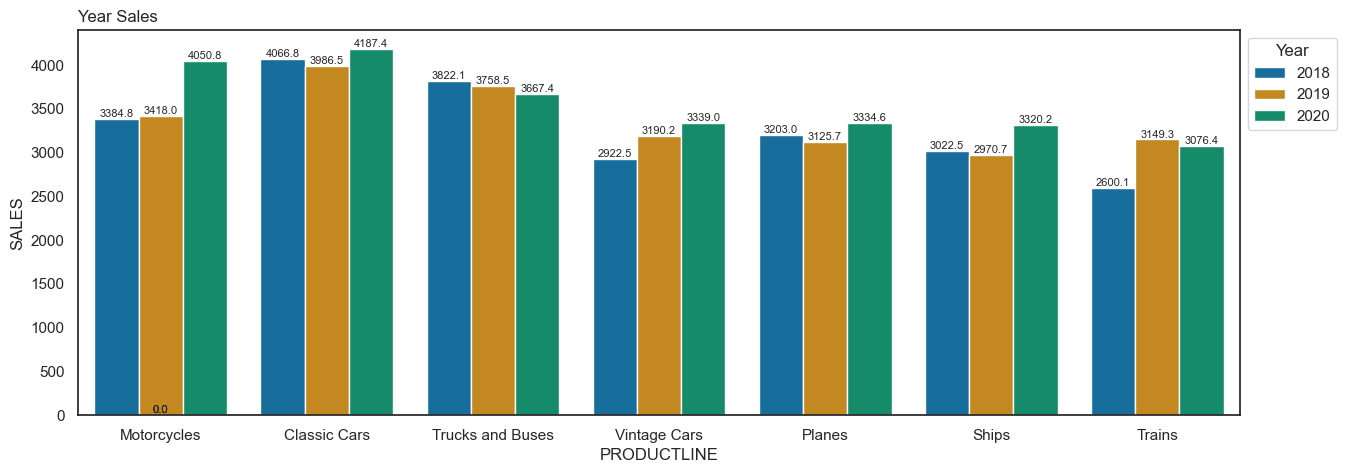

In [84]:
# Comparison of Sales by Productline with hue as Year
sns.set_theme(style='white')
plt.figure(figsize= (15,5))

sns.barplot(data = df, x = 'PRODUCTLINE', y = 'SALES', hue = 'Year', ci = None, palette='colorblind')
plt.legend(title = 'Year',loc = 'upper left',bbox_to_anchor = (1,1))
plt.title('Year Sales', loc = 'left')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8)

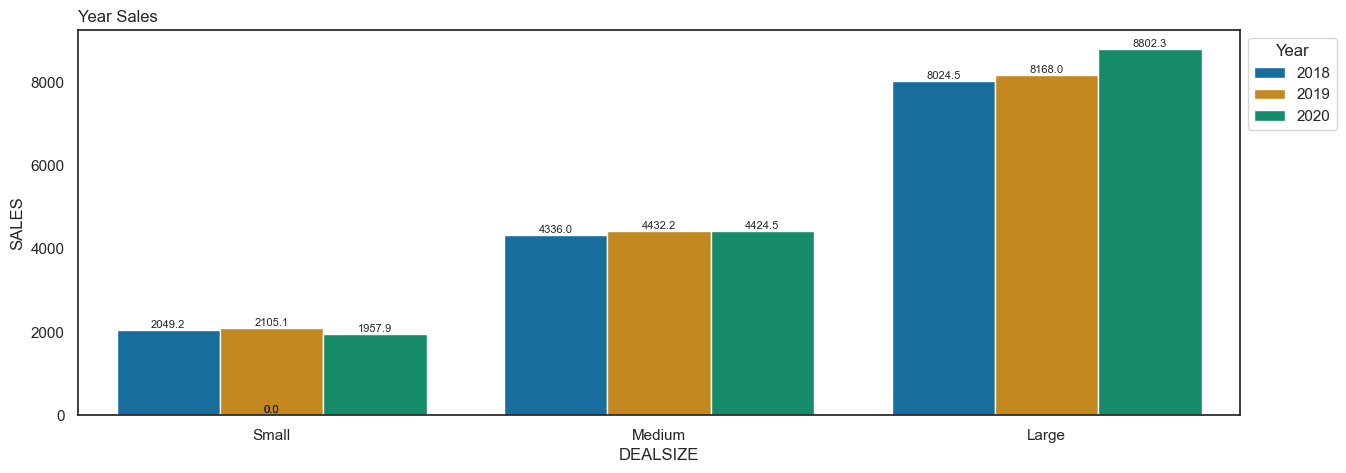

In [85]:
# Comparison of Sales by DealSize with hue as Year
sns.set_theme(style='white')
plt.figure(figsize= (15,5))

sns.barplot(data = df, x = 'DEALSIZE', y = 'SALES', hue = 'Year', ci = None, palette='colorblind')
plt.legend(title = 'Year',loc = 'upper left',bbox_to_anchor = (1,1))
plt.title('Year Sales', loc = 'left')


for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8)

Sales Overview:

298 orders placed by 89 customers from 19 countries in the last 2.5 years.
United States leads in sales, followed by Spain and France. Notable sales from Australia and Singapore in the Eastern Hemisphere.
Among cities, Madrid tops sales, with San Diego and New York City following.
In the Eastern Hemisphere, sales from Australia and Singapore declined, while customers from Japan were added in 2019.
Significant sales increase observed in US and France in 2019.

Product and Revenue:

The company manufactures 109 automobile parts under 7 product lines with prices ranging from 26 to 252.
Classic Car parts generate the maximum revenue through sales (approx. 40%).
Car, Truck, Bus, and Motorcycle parts account for 80% of the company's revenue.

Sales Trends:

Upward sales trend with monthly seasonality. Peak sales in October and November annually.
Higher sales and customer activity in the early months of 2020 compared to previous years.

Concern

No new customers added since September 2019.
Transaction Characteristics:

Most deals are of medium and small size, with transactions typically containing 20 to 50 items.
Key Customers:

Euro Shopping Channel and Mini Gifts Distribution Ltd. are best customers (highest spending, most frequent, and recent).

Customer Retention:

A good customer retention rate of approximately 90% was observed in 2019.